In [1]:
import numpy as np
import matplotlib.pylab as plt
import mesa_reader as mr
%matplotlib inline

# Main-sequence evolution
In this lab, we will study the core hydrogen burning phase of a $1\,\mathrm{M}_\odot$ and a $5\,\mathrm{M}_\odot$ star. The evolution of the $1\,\mathrm{M}_\odot$ model is a continuation of the corresponding pre-MS model. Please `cd` into the corresponding folder and open the `inlist` file in your favourite text editor. Check that this file now indeed loads the `inlist_ms` file instead of the `inlist_pre_ms` file as before. The `inlist` file should look like

```
&star_job

      read_extra_star_job_inlist1 = .true.
      extra_star_job_inlist1_name = 'inlist_ms'

/ ! end of star_job namelist


&controls

      read_extra_controls_inlist1 = .true.
      extra_controls_inlist1_name = 'inlist_ms'

/ ! end of controls namelist


&pgstar

      read_extra_pgstar_inlist1 = .true.
      extra_pgstar_inlist1_name = 'inlist_pgstar'

/ ! end of pgstar namelist
```

The `inlist_ms` file contains the settings to continue the previous run up to a point after core hydrogen exhaustion - the model evolves until the effective temperature drops below $5,000\,\mathrm{K}$. To run this model, simply type `./rn` in the terminal. The usual `pgstar` windows pop up and you can follow the evolution live. After the run finished, hit `Return` and the windows will disappear. (In case you have issues with MESA, you can also download the MESA output [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/1M_ms.tar.gz). To extract the files on the command line, use `tar xzvf <file.tar.gz>` within the corresponding model folder.)

To evolve the $5\,\mathrm{M}_\odot$ model, `cd` into the `mesa-models/5M` folder, execute `./mk` and `./rn` in the terminal, and the evolution of the model starts. This model also runs beyond core hydrogen exhaustion, namely up to the point when its effective temperature is below $10,000\,\mathrm{K}$. (As before, you can download the MESA output [here](http://wwwstaff.ari.uni-heidelberg.de/fschneider/teaching/stellar-cookbook/5M_ms.tar.gz) if there are any issues.)

Watch both stars evolve while trying to already understand what is going on. Once the runs are complete, continue reading this document.

## HR diagram
To get a first overview of the main-sequence evolution, the phase when hydrogen is converted into helium in the core of stars, we plot a HR diagram of the two models and also add the ZAMS from the last lab.

In [2]:
logL_zams, Teff_zams, Rho_c_zams, T7_c_zams = np.loadtxt('../06.zero-age_main-sequence/zams-properties.txt', usecols=(1,4,5,6), unpack=True)
logTeff_zams = np.log10(Teff_zams)

Now that we have grabbed the ZAMS data from last time, execute the following code to make a plot of the HR diagram. The ZAMS will appear as a dotted line and the full tracks will have dashed curves. We then also plot those parts of the evolution with a full line where the central hydrogen mass fraction is larger than $10^{-4}$. The latter singles out the core hydrogen burning phase. (Note how we use the powerful Python masks for this.)

Text(0,0.5,'$\\log\\,L/\\mathrm{L}_\\odot$')

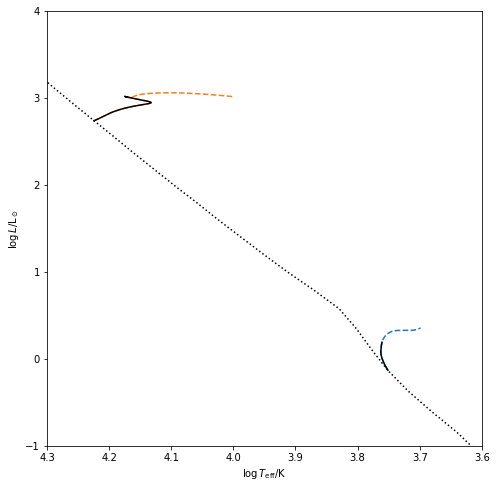

In [3]:
plt.figure(figsize=(8,8)) # let's make this figure a bit larger

# plot ZAMS from last lab
plt.plot(logTeff_zams, logL_zams, 'k:')

# plot 1 Msun track
log_1M = mr.MesaLogDir('../mesa-models/1M/LOGS_1M_ms')
log_L_1M = log_1M.history.log_L
log_Teff_1M = log_1M.history.log_Teff
plt.plot(log_Teff_1M, log_L_1M, '--')
core_H_burn_mask_1M = log_1M.history.center_h1 > 1e-4
plt.plot(log_Teff_1M[core_H_burn_mask_1M], log_L_1M[core_H_burn_mask_1M], 'k-')

#plot 5 Msun track
log_5M = mr.MesaLogDir('../mesa-models/5M/LOGS_5M_ms')
log_L_5M = log_5M.history.log_L
log_Teff_5M = log_5M.history.log_Teff
plt.plot(log_Teff_5M, log_L_5M, '--')
core_H_burn_mask_5M = log_5M.history.center_h1 > 1e-4
plt.plot(log_Teff_5M[core_H_burn_mask_5M], log_L_5M[core_H_burn_mask_5M], 'k-')

# zoom into interesting part of HR and use equal aspect ratio
plt.xlim(4.3, 3.6)
plt.ylim(-1, 4.0)
plt.gca().set_aspect(abs(4.3-3.6)/abs(-1-4.0))

plt.xlabel(r'$\log\,T_\mathrm{eff}/\mathrm{K}$')
plt.ylabel(r'$\log\,L/\mathrm{L}_\odot$')

#### Problem 1:
1. What are the obvious differences between the tracks in the HR diagram?
2. From radioactive elements in meteorites, we know that the solar system is $\approx4.6\times10^{9}\,\mathrm{yr}$. At this age, what is the effective temperature and luminosity of the $1\,\mathrm{M}_\odot$ model and how does it compare to our Sun? *Hint:* The stellar age is stored as `star_age` in MESA's history output, the Sun has an effective temperature of $5,777\,\mathrm{K}$ and the Numpy function `argmin()` comes in handy: via `idx = (np.abs(log_1M.history.star_age - 4.6e9)).argmin()` you can get that index of the `star_age` array where `star_age` is closest to  $4.6\times10^{9}\,\mathrm{yr}$.

In [8]:
# Your solution here
idx = (np.abs(log_1M.history.star_age - 4.6e9)).argmin()
print(idx)
print(log_1M.history.star_age[idx], log_L_1M[idx], log_Teff_1M[idx])

35
4603223373.756722 0.009573272803488643 3.76075613886819


The luminosities of the two stars increase only slightly over the course of core hydrogen burning, namely by factors of about 2:

In [14]:
print('1 Msun:', np.power(10, log_L_1M[core_H_burn_mask_1M][-1] - log_L_1M[core_H_burn_mask_1M][0]))
print('5 Msun:', np.power(10, log_L_5M[core_H_burn_mask_5M][-1] - log_L_5M[core_H_burn_mask_5M][0]))

1 Msun: 2.0964025229935923
5 Msun: 1.8703520041166621


This increase can be fully understood by the change in chemical composition: the mean molecular weight $\mu$ of stars increases with time when hydrogen is converted into helium. From the ML relation discussed last time, we know that $L \propto \mu^4 M^3$. From the MESA models, we can easily compute the mass averaged mean molecular weight over the whole star,
\begin{align}
\bar{\mu} = \frac{1}{M}\int_0^M\,\mu(m)\,\mathrm{d}m.
\end{align}
We have computed this quantity for you and it can be accessed via `avg_mu` in the history output.

**For the adventurers among you:** $\bar{\mu}$ is a quantity that is not available by default in MESA's history output and one has to compute it during runtime. This can be done by adding appropriate code to the `src/run_stars_extras.f` file which contains the functions `how_many_extra_history_columns()` and `data_for_extra_history_columns()` to do so. Within MESA, the masses of the shells are stored in the vector `s% dm` and the mean molecular weight in `s% mu`. The dot product divided by the total mass of the stars then gives the mass averaged mean molecular weight. Similarly, one can also add self-computed quantities to MESA's profile outputs. Have a look into the `src/run_stars_extras.f` files *after* this lab if you are interested.

#### Problem 2:
Compute the increase of $\bar{\mu}$ from the two MESA models and check whether this can indeed explain the approximate luminosity increase during the main-sequence evolution.

In [15]:
# Your solution here
avg_mu_1M = log_1M.history.avg_mu[core_H_burn_mask_1M]

## Central density-temperature plane
In the central density-temperature plane, the evolution of the two stars looks like the following:

Text(0,0.5,'$\\log\\,T_\\mathrm{c}/\\mathrm{K}$')

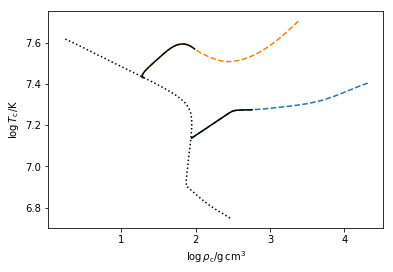

In [16]:
log_Rho_c_zams = np.log10(Rho_c_zams)
log_T_c_zams = np.log10(T7_c_zams) + 7.0

# plot ZAMS from last lab
plt.plot(log_Rho_c_zams, log_T_c_zams, 'k:')

# plot 1 Msun track
log_Rho_c_1M = log_1M.history.log_center_Rho
log_T_c_1M = log_1M.history.log_center_T
plt.plot(log_Rho_c_1M, log_T_c_1M, '--')
plt.plot(log_Rho_c_1M[core_H_burn_mask_1M], log_T_c_1M[core_H_burn_mask_1M], 'k-')

# plot 5 Msun track
log_Rho_c_5M = log_5M.history.log_center_Rho
log_T_c_5M = log_5M.history.log_center_T
plt.plot(log_Rho_c_5M, log_T_c_5M, '--')
plt.plot(log_Rho_c_5M[core_H_burn_mask_5M], log_T_c_5M[core_H_burn_mask_5M], 'k-')

plt.xlabel(r'$\log\,\rho_\mathrm{c}/\mathrm{g}\,\mathrm{cm}^{3}$')
plt.ylabel(r'$\log\,T_\mathrm{c}/\mathrm{K}$')

As one can see, also the central temperature hardly changes over the course of the MS evolution. During the MS evolution, stars are in hydrostatic and thermal equilibrium. The latter means that the luminosity emitted at the surface equals the energy generated in the core by nuclear burning, $L = L_\mathrm{nuc}$. Hydrogen burning proceeds via the pp chain and the CNO cycle.

#### Problem 3:
Given the relatively small increase in the total stellar luminosity over the MS evolution, why are stars so excellent thermostats and keep almost the same temperature in their cores? *Hint:* Recall how nuclear energy generation during hydrogen burning scales with temperature.

## Kippenhahn diagram
We now introduce a new type of diagram that you have already seen in one of the `pgstar` windows, the Kippenhahn diagram. Here, we will use the Python package `mkipp` from https://github.com/orlox/mkipp for these diagrams. 

Simply execute the code below:

In [1]:
import mkipp

# main Kippenhahn diagram
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['../mesa-models/1M/LOGS_1M_ms'], decorate_plot = False))

# we used 'decorate_plot = False', so add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

# xy labels
plt.xlabel('Model number')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

Green hatching indicates convective regions, the blue color scale shows the nuclear energy generation and the blue dotted curce traces the helium core. The standard Kippenhahn diagram is plotted as a function of model number - model numbers have the advantage that even short-lived phases are easily visible in a Kippenhahn diagram (add `xaxis = 'star_age'` to the arguments and the x-axis will show the age of the star in yr and not the model number).

#### Problem 4:
1. Describe the Kippenhahn diagram of the MS evolution of a $1\,\mathrm{M}_\odot$ star. 
2. Make a similar plot for the $5\,\mathrm{M}_\odot$ star and describe what you see.
3. Why does the convective core recede over the evolution? *Hint:* Recall why regions become convective from the last lab and what the dominant opacity source in the hot core of a $5\,\mathrm{M}_\odot$ star is.

../mesa-models/5M/LOGS_5M_ms ['../mesa-models/5M/LOGS_5M_ms']
Reading profile data
Reading history data
Constructing mixing regions
there are 40 mixing zones


Text(36.625,0.5,'$m\\,/\\,\\mathrm{M}_\\odot$')

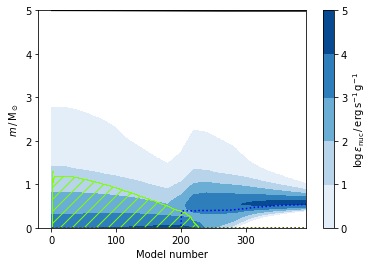

In [21]:
# Your solution here
# main Kippenhahn diagram
kipp_plot = mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs=['../mesa-models/5M/LOGS_5M_ms'], decorate_plot = False))

# we used 'decorate_plot = False', so add colorbar and label
cbar = plt.colorbar(kipp_plot.contour_plot, pad=0.05)
cbar.set_label(r'$\log\, \epsilon_\mathrm{nuc}\,/\,\mathrm{erg}\,\mathrm{s}^{-1}\,\mathrm{g}^{-1}$')

# xy labels
plt.xlabel('Model number')
plt.ylabel(r'$m\,/\,\mathrm{M}_\odot$')

## Hydrogen profiles


The hydrogen profiles inside the $1\,\mathrm{M}_\odot$ and $5\,\mathrm{M}_\odot$ stars hold further important information on understanding core hydrogen-burning. So let's have a look at these profiles over the main-sequence evolution of the $5\,\mathrm{M}_\odot$ star first.

From the Kippenhahn diagram, we know that model numbers 0-220 cover the core hydrogen-burning phase. So, as before let's check out for which models we have detailed profile information:

In [22]:
print('model numbers:', log_5M.profiles.model_numbers)
print('profile numbers:', log_5M.profiles.profile_numbers)

model numbers: [  1  20  40  60  80 100 120 129 140 160 180 200 220 240 260 280 288 300
 320 340 360 380 393]
profile numbers: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


As before, we can now access the profile data, for example the mass coordinate via `log_5M.profile_data(1).mass` or `log_5M.profile_data(1).data('mass')`. We now plot 5 profiles and see how the hydrogen profiles change over the course of the main-sequence evolution. To this end, we have defined a new function `plot_x_profile()` that makes the following code more readable.

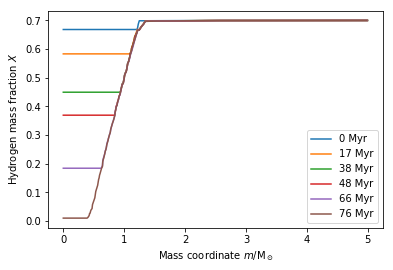

In [23]:
def plot_x_profile(log, model):
    plt.plot(log.profile_data(model).mass, log.profile_data(model).h1, label='%.0f Myr' % (log.profile_data(model).star_age/1e6))

plot_x_profile(log_5M, 1)
plot_x_profile(log_5M, 60)
plot_x_profile(log_5M, 100)
plot_x_profile(log_5M, 120)
plot_x_profile(log_5M, 160)
plot_x_profile(log_5M, 200)
    
plt.xlabel(r'Mass coordinate $m/\mathrm{M}_\odot$')
plt.ylabel(r'Hydrogen mass fraction $X$')

plt.legend()

So in combination with the Kippenhahn diagram, we notice that the region, where the convective core is, the star is always mixed and the hydrogen mass fraction decreases. Also, we can clearly see the receding convective core over the MS evolution and how the receding core leaves behind a chemical gradient in the star. 

Once there is no hydrogen in the core anymore, burning stops in the core as we have seen in the Kippenhahn diagram. This is the point in the HRD, when the star stops expanding and instead contracts (c.f. the so-called Henyey hook at the end of the MS). While the core (and the star) contracts, the regions just outside the former convective core heat up and hydrogen burning is ignited there, now as so-called shell hydrogen-burning. At this point, the contraction of the star stops and the star evolves to cooler temperatures again in the HRD.  

The whole core hydrogen-burning stage lasts for about $80\,\mathrm{Myr}$.

For the $1\,\mathrm{M}_\odot$ model, the hydrogen profile looks the following:

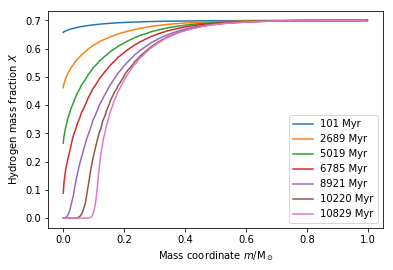

In [24]:
plot_x_profile(log_1M, 1)
plot_x_profile(log_1M, 20)
plot_x_profile(log_1M, 40)
plot_x_profile(log_1M, 60)
plot_x_profile(log_1M, 100)
plot_x_profile(log_1M, 160)
plot_x_profile(log_1M, 200)
    
plt.xlabel(r'Mass coordinate $m/\mathrm{M}_\odot$')
plt.ylabel(r'Hydrogen mass fraction $X$')

plt.legend()

#### Problem 5:
1. How does core hydrogen-burning differ and what does this mean for the chemical gradient? 
2. How does the transition from core to shell hydrogen-burning differ? So why do these stars not show a hook feature in the HRD?
3. How long does core hydrogen-burning take for this model?

## Main-sequence lifetime
In the above examples, we have seen that the main-sequence lifetime of stars depends sensitively on mass. While the $5\,\mathrm{M}_\odot$ has a main-sequence lifetime of about $80\,\mathrm{Myr}$, the $1\,\mathrm{M}_\odot$ model burns hydrogen in its core for almost $10\,\mathrm{Gyr}$. 

This can be easily understood. The total available fuel of stars is a certain fraction of the total mass of the star. Because stars are in thermal equilibrium during their MS evolution, the rate at which hydrogen is burnt in the core is the stellar surface luminosity. So the lifetime of this phase is
\begin{align}
\tau_\mathrm{MS} \propto \frac{M}{L} \propto \frac{M}{M^3} = M^{-2},
\end{align}
where we have used the mass-luminosity relation from homology.

#### Student-report:
**Part 1:** From your power-law fits to the different mass ranges of the ML relation for ZAMS stars, obtain corresponding scaling relations for the MS lifetime of stars of various masses. For very massive stars, how does the lifetime scale with mass?

**Part 2:** Imagine there is a star cluster born that is so rich in stars that all masses up to the highest are well populated. While the stars age, we take snapshots of the distribution of stars in the HR diagram. Which stars will finish core hydrogen burning first and what does that imply for the HR diagram? How does this connect to the so-called 'turn-off' mass (if you do not know what the turn-off mass is, look it up)? So why is the turn-off mass so helpful when determining the age of star clusters?

## A major complication - convective core overshooting
For stars burning hydrogen via the CNO cycle, a convective core forms. In reality, convective bubbles that rise and sink in this core do not stop at the formal boundaries but they can penetrate into the regions above. Effectively, this means that they can extend the convective core by some amount, bring fresh hydrogen fuel into the core such that the whole MS phase lasts longer. In the end, this also affects the mass of the helium cores at the end of the MS.

Convection is a dynamical phenomenon and convective eddies rise and sink on a dynamical timescale. These timescales are way too short to be resolved by 1D stellar evolution models. Moreover, convection is an inherently 3D process. Also no 3D simulations were able to provide a satisfying answer to this question.

All of this imply significant uncertainties in how stars look like in their interiors at the end of the MS. There have been many efforts to calibrate so-called overshooting parameters to observations of stars but there is still no definite and accurate solution to this issue. Convective core overshooting therefore is still one major complication in understanding the evolution of stars. 